In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv


--2024-01-04 14:35:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-04 14:35:27 (3.70 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [3]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read data
Data = pd.read_csv("drug200.csv")


In [6]:
Data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
Data.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
Data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [10]:
Data.Sex.value_counts()


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
Data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [12]:
Data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [13]:
skew_Age = Data.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skew_Age)

Age skewness:  0.03030835703000607


In [14]:
skew_Na_to_K = Data.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skew_Na_to_K)

Na to K skewness:  1.039341186028881


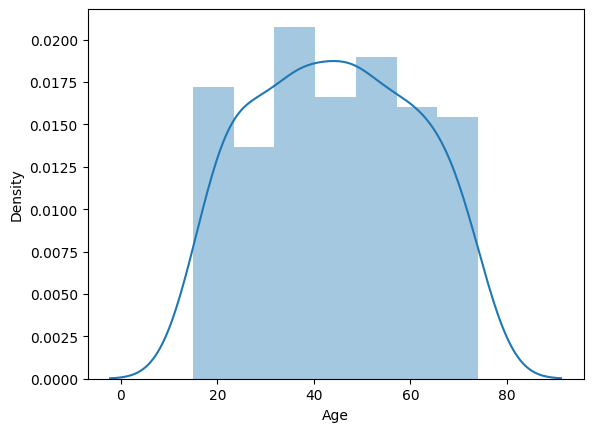

In [15]:
sns.distplot(Data['Age']);

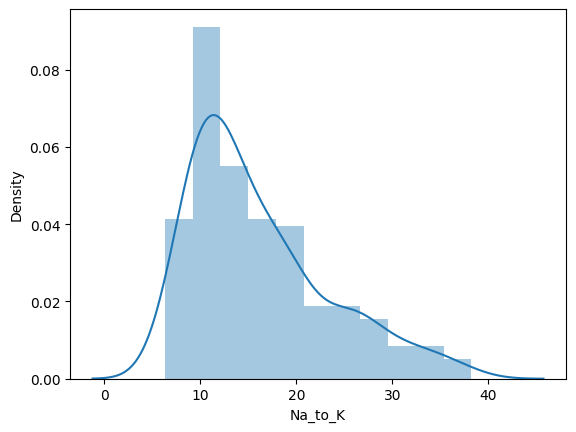

In [16]:
sns.distplot(Data['Na_to_K']);

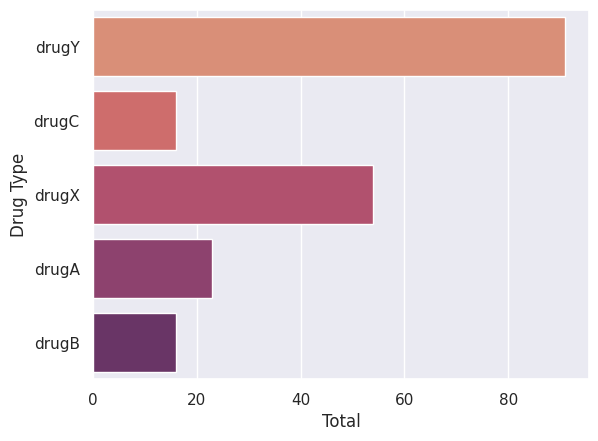

In [17]:
#CHART FOR DRUGTYPE DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=Data, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

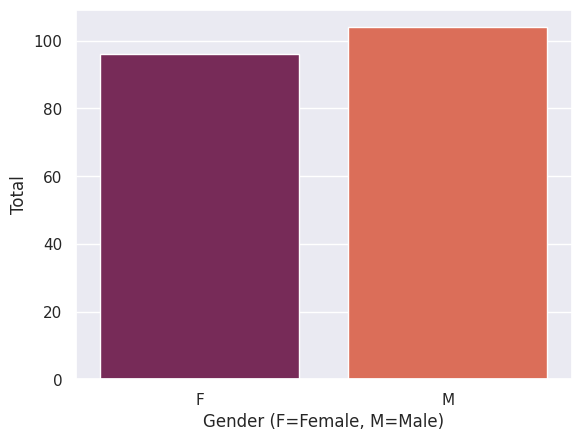

In [18]:
#CHART FOR GENDER DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=Data, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

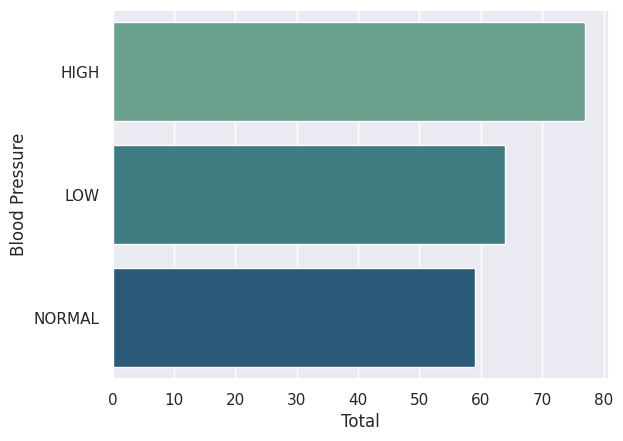

In [19]:
#CHART FOR BLOOD PRESSURE DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=Data, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

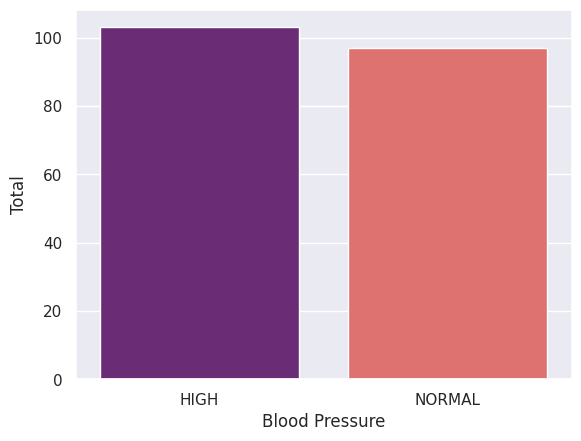

In [20]:
#CHART FOR CHOLESTEROLE DISTRIBUTION
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=Data, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

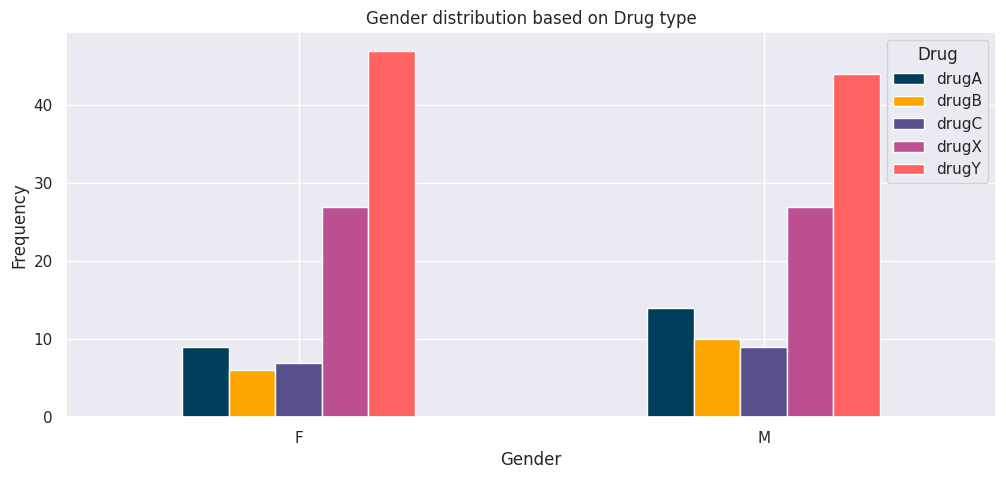

In [21]:
# Graph for Gender Distribution based on Drug Type
pd.crosstab(Data.Sex,Data.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

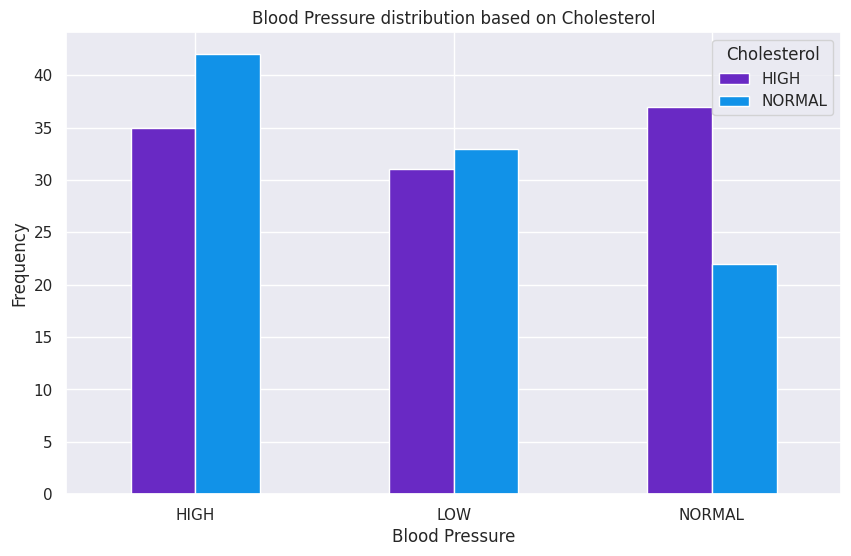

In [24]:
# Graph for Blood Pressure Distribution based on Cholesetrol
pd.crosstab(Data.BP,Data.Cholesterol).plot(kind="bar",figsize=(10,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [26]:
#BINNING THE DATA
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
Data['Age_binned'] = pd.cut(Data['Age'], bins=bin_age, labels=category_age)
Data= Data.drop(['Age'], axis = 1)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
#SPLITTING THE DATA
X = Data.drop(["Drug"], axis=1)
y = Data["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [30]:
X_train.head()

,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s
131,32.922,0,1,0,1,0,0,1,0,0,0,0,1,0,0
96,38.247,1,0,0,1,0,1,0,0,0,0,0,1,0,0
181,13.884,1,0,0,0,1,1,0,0,0,0,0,1,0,0
19,25.974,1,0,1,0,0,0,1,0,0,1,0,0,0,0
153,14.642,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [31]:
X_test.head()

,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s
18,7.298,0,1,0,1,0,1,0,0,1,0,0,0,0,0
170,12.879,1,0,0,0,1,1,0,0,1,0,0,0,0,0
107,20.013,0,1,0,1,0,1,0,0,0,0,1,0,0,0
98,35.639,0,1,1,0,0,0,1,0,1,0,0,0,0,0
177,19.011,0,1,0,0,1,1,0,0,1,0,0,0,0,0


In [33]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

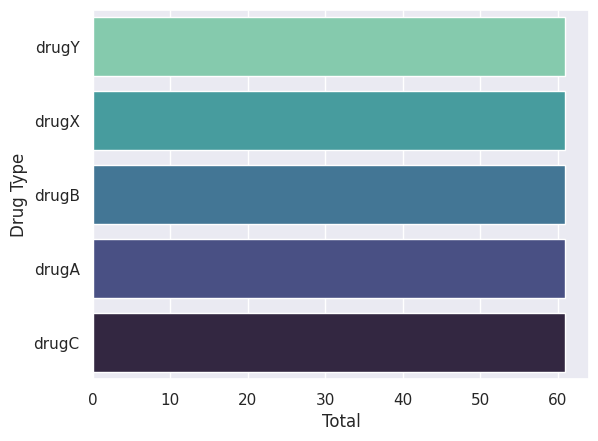

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=Data, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [36]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       0.75      1.00      0.86         3
       drugC       0.80      1.00      0.89         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.90      0.95        30

    accuracy                           0.95        60
   macro avg       0.88      0.98      0.92        60
weighted avg       0.96      0.95      0.95        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 1  1  1  0 27]]
Logistic Regression accuracy is: 95.00%


In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       drugA       0.50      0.80      0.62         5
       drugB       0.33      0.33      0.33         3
       drugC       0.33      0.50      0.40         4
       drugX       0.92      0.67      0.77        18
       drugY       1.00      1.00      1.00        30

    accuracy                           0.82        60
   macro avg       0.62      0.66      0.62        60
weighted avg       0.86      0.82      0.83        60

[[ 4  1  0  0  0]
 [ 2  1  0  0  0]
 [ 1  0  2  1  0]
 [ 1  1  4 12  0]
 [ 0  0  0  0 30]]
K Neighbours accuracy is: 81.67%


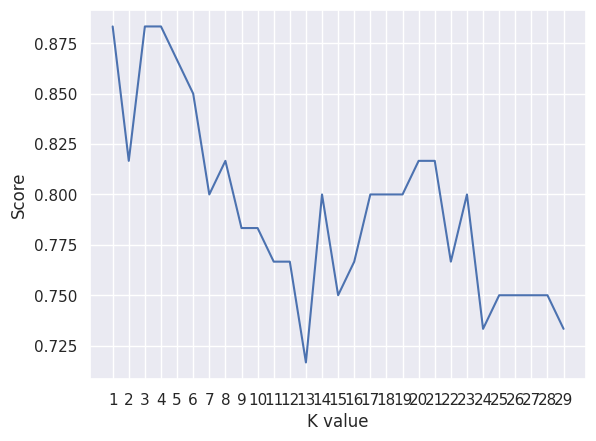

KNN Acc Max 88.33%


In [38]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

In [39]:
#SVC
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
SVC accuracy is: 100.00%


In [40]:
#NAIVE BAYES
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       drugA       0.42      1.00      0.59         5
       drugB       0.50      0.67      0.57         3
       drugC       0.57      1.00      0.73         4
       drugX       0.90      1.00      0.95        18
       drugY       1.00      0.57      0.72        30

    accuracy                           0.77        60
   macro avg       0.68      0.85      0.71        60
weighted avg       0.87      0.77      0.77        60

[[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 6  2  3  2 17]]
Naive Bayes accuracy is: 76.67%


In [41]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       0.56      1.00      0.71         5
       drugB       0.50      1.00      0.67         3
       drugC       0.57      1.00      0.73         4
       drugX       0.78      1.00      0.88        18
       drugY       1.00      0.50      0.67        30

    accuracy                           0.75        60
   macro avg       0.68      0.90      0.73        60
weighted avg       0.84      0.75      0.74        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 4  3  3  5 15]]
Gaussian Naive Bayes accuracy is: 75.00%


In [42]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      0.80      0.89         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           0.98        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.99      0.98      0.98        60

[[ 4  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Decision Tree accuracy is: 98.33%


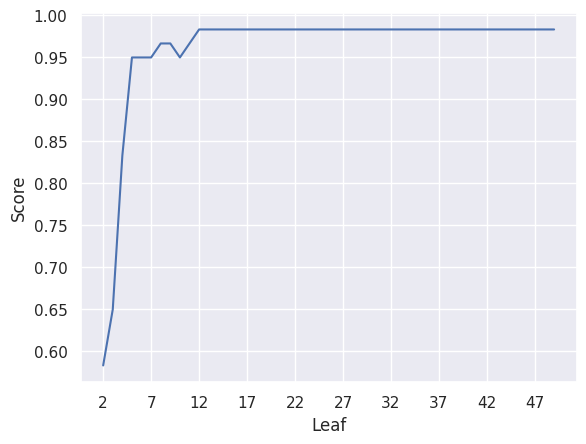

DT Acc Max 98.33%


In [43]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [44]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Random Forest accuracy is: 100.00%


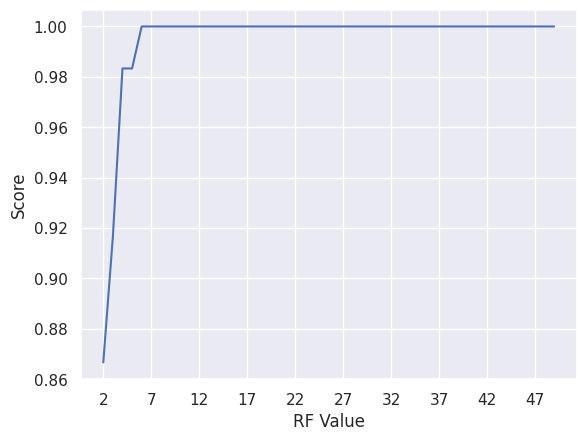

RF Acc Max 100.00%


In [45]:

scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [46]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,SVM,100.000000
8,Random Forest,100.000000
9,Random Forest Max,100.000000
6,Decision Tree,98.333333
7,Decision Tree Max,98.333333
0,Logistic Regression,95.000000
2,K Neighbors Max,88.333333
1,K Neighbors,81.666667
4,Categorical NB,76.666667
5,Gaussian NB,75.000000
